In [172]:
# Importing all the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Data Collection

In [75]:
path = 'https://raw.githubusercontent.com/MuskanKhandelia/Bangalore_House_Price_Prediction/main/bangalore%20house%20price%20prediction%20data.csv'
data = pd.read_csv(path)
original_data = data.copy()
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Ramagondanahalli,location_Kaggadasapura,location_Kundalahalli,location_Koramangala,location_Hulimavu,location_Budigere,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_8th Phase JP Nagar,location_Gottigere,location_JP Nagar,location_Yeshwanthpur,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Vijayanagar,location_Kengeri,location_Brookefield,location_Sahakara Nagar,location_Hosa Road,location_Old Airport Road,location_Bommasandra,location_Balagere,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Panathur,location_Kudlu Gate,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Talaghattapura,location_Mysore Road,location_Kadugodi,location_Frazer Town,location_Dodda Nekkundi,location_Devanahalli,location_Kanakapura,location_Attibele,location_Anekal,location_Lakshminarayana Pura,location_Nagarbhavi,location_Ananth Nagar,location_5th Phase JP Nagar,location_TC Palaya,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Jalahalli,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Preparation

### Data Cleaning

In [76]:
data.shape

(7120, 108)

This means that this dataset has 7120 rows and 108 columns.

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


In [78]:
null_records = data.isnull().sum() 
for index,value in null_records.items():
    if value > 0:
        print(index,value)

There are no null values in the dataset. 

In [79]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
data.dtypes

bath                                 float64
balcony                              float64
price                                float64
total_sqft_int                       float64
bhk                                    int64
price_per_sqft                       float64
area_typeSuper built-up  Area          int64
area_typeBuilt-up  Area                int64
area_typePlot  Area                    int64
availability_Ready To Move             int64
location_Whitefield                    int64
location_Sarjapur  Road                int64
location_Electronic City               int64
location_Marathahalli                  int64
location_Raja Rajeshwari Nagar         int64
location_Haralur Road                  int64
location_Hennur Road                   int64
location_Bannerghatta Road             int64
location_Uttarahalli                   int64
location_Thanisandra                   int64
location_Electronic City Phase II      int64
location_Hebbal                        int64
location_7

We observe that the data types of 'bath' and 'balcony' are floating-point, even though their values cannot be decimal. This indicates a problem in those specific columns.

In [80]:
data['bath'].unique()

array([3., 2., 1., 4., 5., 9., 6., 8., 7.])

Decimal values are absent; however, the data type is currently set to float, necessitating a change.

In [81]:
data['bath'] = data['bath'].astype(int)
data['bath'].dtype

dtype('int32')

In [82]:
data['balcony'].unique()

array([2.        , 3.        , 1.        , 0.        , 1.58437574])

We observe that the 'balcony' column contains decimal values, which is incorrect since balcony values cannot be in decimal form.

In [83]:
filtered_data = data[(data['balcony'] > 1.1) & (data['balcony'] < 2)]
filtered_data.shape

(202, 108)

We have 202 records characterized by the 'balcony' data type, containing decimal values. Since this count constitutes only 2.83% of the total records and is relatively insignificant, we will exclude these records.

In [84]:
indexes = filtered_data.index
data.drop(indexes, inplace = True)
data.shape

(6918, 108)

In [85]:
data['balcony'] = data['balcony'].astype(int)
data['balcony'].dtype

dtype('int32')

In [144]:
columns = cleaned_data.columns
for i in range(len(columns)):
    print(columns[i])

bath
balcony
price
total_sqft
bhk
price_per_sqft
super_builtup_area
builtup_area
plot_area
ready_to_move
location_Whitefield
location_Sarjapur  Road
location_Electronic City
location_Marathahalli
location_Raja Rajeshwari Nagar
location_Haralur Road
location_Hennur Road
location_Bannerghatta Road
location_Uttarahalli
location_Thanisandra
location_Electronic City Phase II
location_Hebbal
location_7th Phase JP Nagar
location_Yelahanka
location_Kanakpura Road
location_KR Puram
location_Sarjapur
location_Rajaji Nagar
location_Kasavanhalli
location_Bellandur
location_Begur Road
location_Banashankari
location_Kothanur
location_Hormavu
location_Harlur
location_Akshaya Nagar
location_Jakkur
location_Electronics City Phase 1
location_Varthur
location_Chandapura
location_HSR Layout
location_Hennur
location_Ramamurthy Nagar
location_Ramagondanahalli
location_Kaggadasapura
location_Kundalahalli
location_Koramangala
location_Hulimavu
location_Budigere
location_Hoodi
location_Malleshwaram
location_He

The column names are inappropriate and excessively lengthy, thus requiring a renaming.

In [87]:
data.rename(columns = {'total_sqft_int':'total_sqft','area_typeSuper built-up  Area':'super_builtup_area',
             'area_typeBuilt-up  Area':'builtup_area','area_typePlot  Area':'plot_area',
             'availability_Ready To Move':'ready_to_move'}, inplace = True)

In [88]:
data.describe()

,bath,balcony,price,total_sqft,bhk,price_per_sqft,super_builtup_area,builtup_area,plot_area,ready_to_move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Ramagondanahalli,location_Kaggadasapura,location_Kundalahalli,location_Koramangala,location_Hulimavu,location_Budigere,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_8th Phase JP Nagar,location_Gottigere,location_JP Nagar,location_Yeshwanthpur,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Vijayanagar,location_Kengeri,location_Brookefield,location_Sahakara Nagar,location_Hosa Road,location_Old Airport Road,location_Bommasandra,location_Balagere,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Panathur,location_Kudlu Gate,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Talaghattapura,location_Mysore Road,location_Kadugodi,location_Frazer Town,location_Dodda Nekkundi,location_Devanahalli,location_Kanakapura,location_Attibele,location_Anekal,location_Lakshminarayana Pura,location_Nagarbhavi,location_Ananth Nagar,location_5th Phase JP Nagar,location_TC Palaya,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Jalahalli,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
count,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000,6918.000000
mean,2.357473,1.572420,92.322058,1442.094279,2.435675,5868.919399,0.753397,0.181700,0.060278,0.789968,0.032524,0.025296,0.022839,0.016479,0.016479,0.016479,0.014455,0.015033,0.015322,0.014889,0.012720,0.012576,0.012431,0.012431,0.011998,0.008818,0.008095,0.007661,0.007661,0.007372,0.007228,0.007083,0.006360,0.006794,0.006360,0.005637,0.006071,0.006071,0.005637,0.005637,0.005348,0.005493,0.005637,0.005493,0.005348,0.005493,0.005204,0.005204,0.005348,0.

In [89]:
data = data.reset_index(drop = True)
cleaned_data = data.copy()
cleaned_data.tail()

,bath,balcony,price,total_sqft,bhk,price_per_sqft,super_builtup_area,builtup_area,plot_area,ready_to_move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Ramagondanahalli,location_Kaggadasapura,location_Kundalahalli,location_Koramangala,location_Hulimavu,location_Budigere,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_8th Phase JP Nagar,location_Gottigere,location_JP Nagar,location_Yeshwanthpur,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Vijayanagar,location_Kengeri,location_Brookefield,location_Sahakara Nagar,location_Hosa Road,location_Old Airport Road,location_Bommasandra,location_Balagere,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Panathur,location_Kudlu Gate,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Talaghattapura,location_Mysore Road,location_Kadugodi,location_Frazer Town,location_Dodda Nekkundi,location_Devanahalli,location_Kanakapura,location_Attibele,location_Anekal,location_Lakshminarayana Pura,location_Nagarbhavi,location_Ananth Nagar,location_5th Phase JP Nagar,location_TC Palaya,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Jalahalli,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
6913,3,2,325.00,2900.0,3,11206.896552,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6914,3,1,84.83,1780.0,3,4765.730337,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6915,2,1,48.00,880.0,2,5454.545455,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6916,2,1,55.00,1000.0,2,5500.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6917,2,1,78.00,1400.0,3,5571.428571,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Data Analysis and Visualization

In [90]:
area_data = data.filter(regex = 'area$')
location_data = data.filter(regex = '^location')

In [91]:
area = []
for i,j in area_data.iterrows():
    area.append(j[j == max(j)].index[0])
    
area_df = pd.DataFrame(area, columns = ['area'])
area_df.head()

,area
0,super_builtup_area
1,builtup_area
2,super_builtup_area
3,super_builtup_area
4,plot_area


In [92]:
location = []
for i,j in location_data.iterrows():
    if max(j) == 0:
        location.append('Not specified')
    else:
        location.append(j[j == max(j)].index[0])
        
location_df = pd.DataFrame(location, columns = ['location'])
location_df.head()

,location
0,Not specified
1,Not specified
2,Not specified
3,Not specified
4,Not specified


We have consolidated all the numerical columns related to 'area' and 'location' into single categorical columns for more effective analysis and visualization.

In [93]:
data = pd.concat([data[['bath', 'balcony', 'price', 'total_sqft', 'bhk', 'price_per_sqft','ready_to_move']],
                  area_df,location_df], axis = 1)
data.head()

,bath,balcony,price,total_sqft,bhk,price_per_sqft,ready_to_move,area,location
0,3,2,150.0,1672.0,3,8971.291866,1,super_builtup_area,Not specified
1,3,3,149.0,1750.0,3,8514.285714,1,builtup_area,Not specified
2,3,2,150.0,1750.0,3,8571.428571,1,super_builtup_area,Not specified
3,2,2,40.0,1250.0,2,3200.000000,1,super_builtup_area,Not specified
4,2,2,83.0,1200.0,2,6916.666667,1,plot_area,Not specified


This is the data that we intend to utilize for analysis and visualization.

<Axes: >

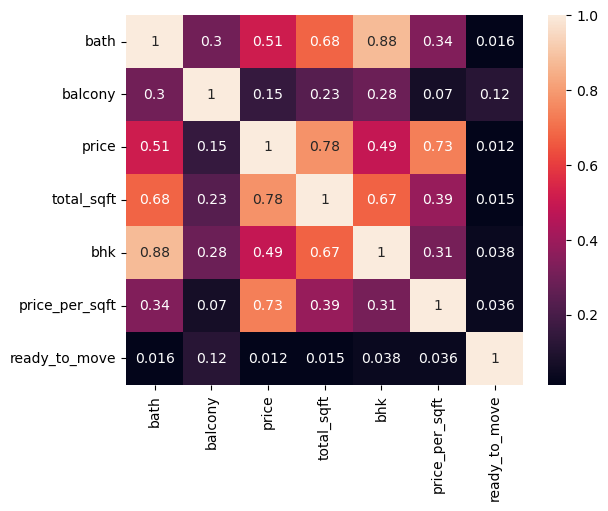

In [95]:
corr = data[['bath', 'balcony', 'price', 'total_sqft', 'bhk', 'price_per_sqft','ready_to_move']].corr()
sns.heatmap(data = corr, annot = True)

The variable 'total_sqft' demonstrates a strong correlation with 'price,' while 'bath' and 'bhk' exhibit moderate correlations with 'price'. Other variables show very weak correlation.

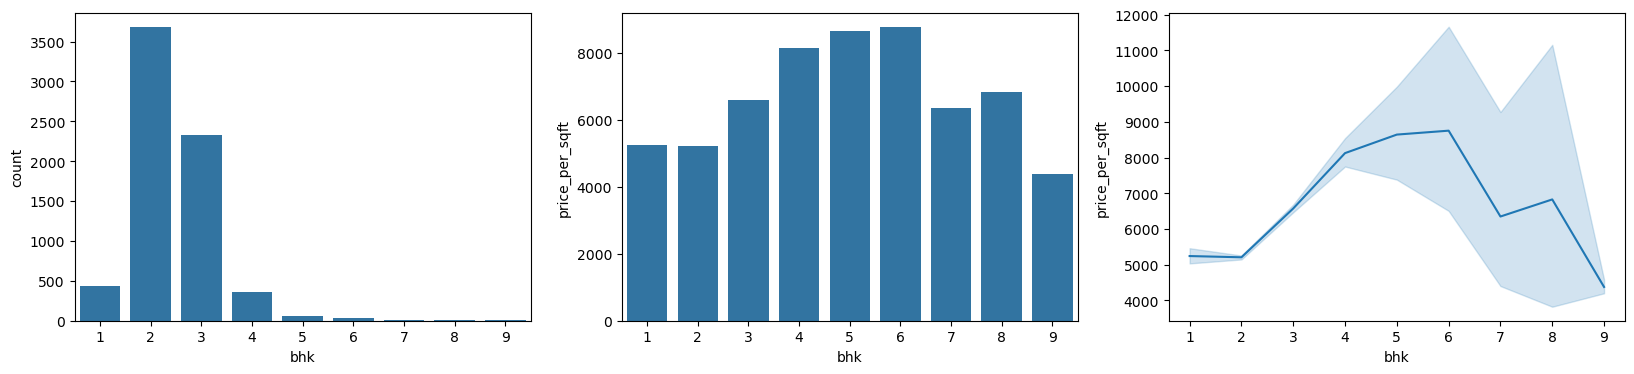

In [118]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.countplot(data = data, x = 'bhk',ax = axs[0])
sns.barplot(x = 'bhk', y = 'price_per_sqft', data = data, errorbar = None, ax = axs[1])
sns.lineplot(x = 'bhk', y = 'price_per_sqft', data = data)

plt.show()

We observe that the largest proportion of houses consists of 2 BHK, followed by 3 BHK. However, the highest average price per sqft is associated with 6 and 5 BHK, with 4 BHK following closely behind.

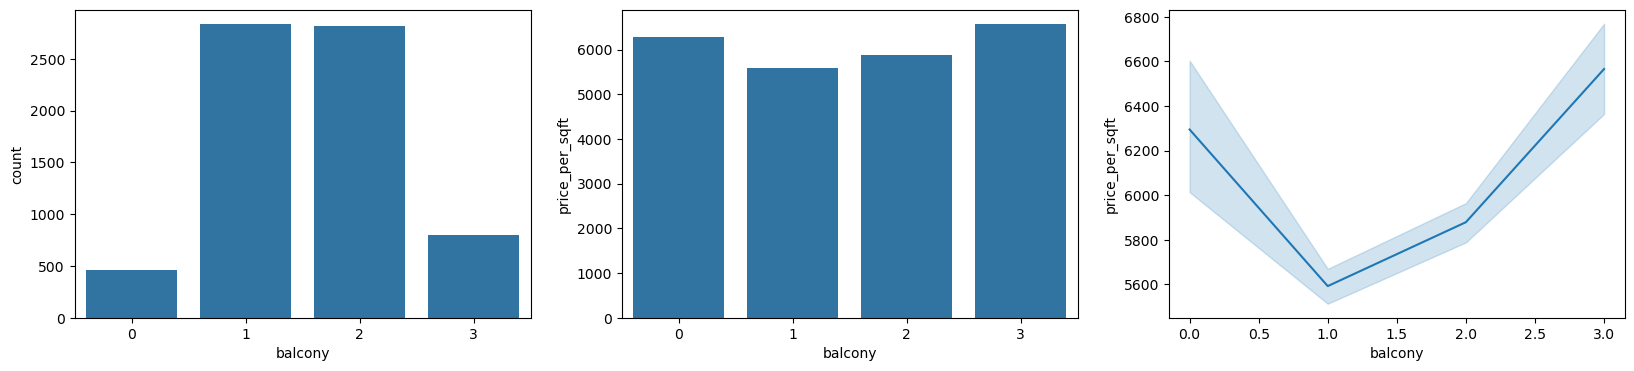

In [114]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.countplot(data = data, x = 'balcony',ax = axs[0])
sns.barplot(x = 'balcony', y = 'price_per_sqft', data = data, errorbar = None, ax = axs[1])
sns.lineplot(x = 'balcony', y = 'price_per_sqft', data = data)

plt.show()

We notice that the majority of houses feature either 1 or 2 balconies. However, houses with 3 balconies have the highest average price per sqft, followed by those with no balconies.

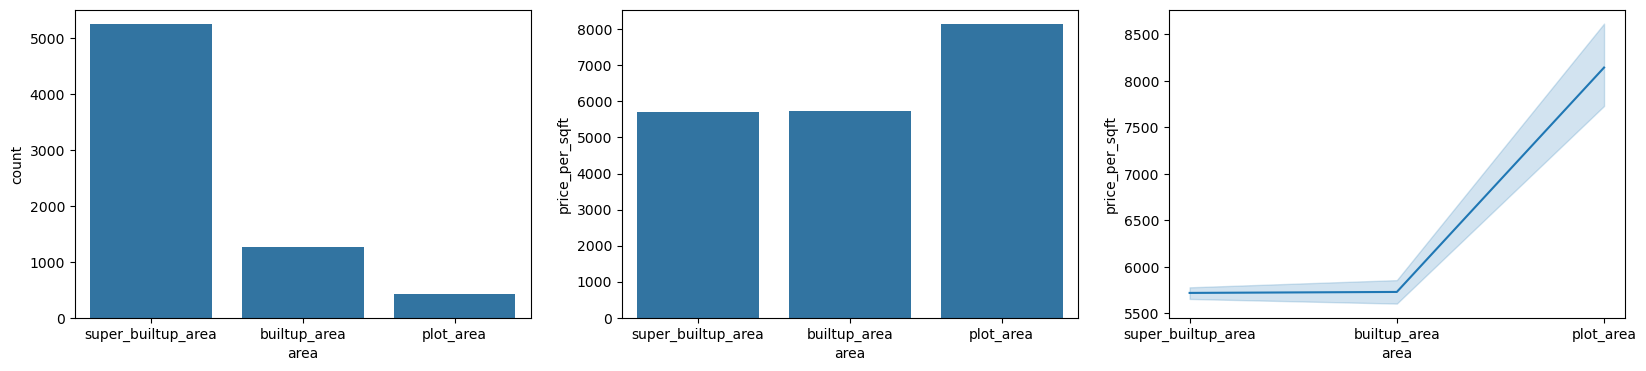

In [115]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

sns.countplot(data = data, x = 'area',ax = axs[0])
sns.barplot(x = 'area', y = 'price_per_sqft', data = data, errorbar = None, ax = axs[1])
sns.lineplot(x = 'area', y = 'price_per_sqft', data = data)

plt.show()

Most homes fall under the category of 'super built-up area,' yet the area type with the highest average price per sqft is 'plot area.'

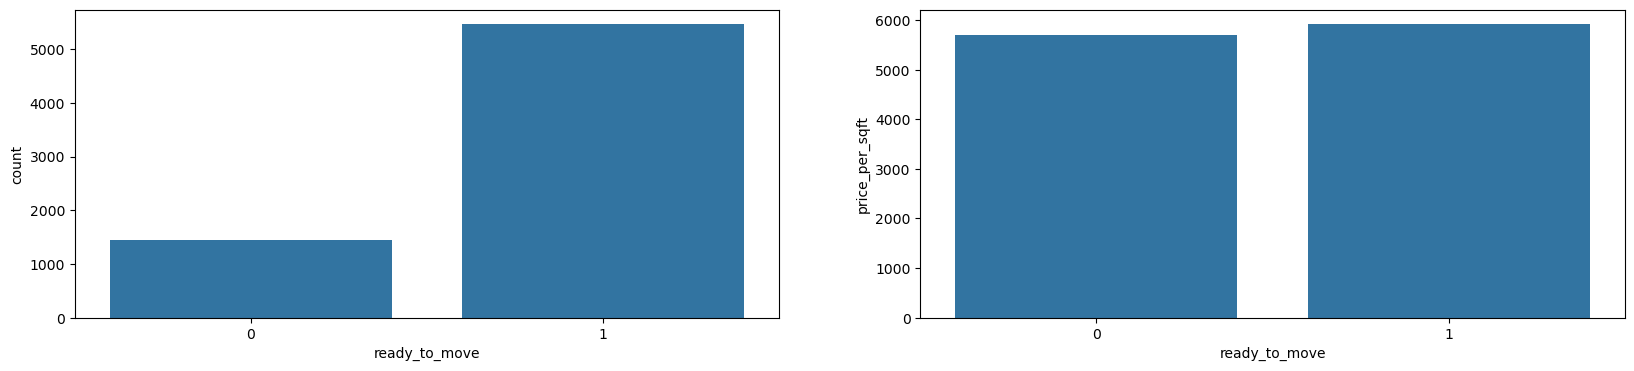

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(20, 4))

sns.countplot(data = data, x = 'ready_to_move',ax = axs[0])
sns.barplot(x = 'ready_to_move', y = 'price_per_sqft', data = data, errorbar = None, ax = axs[1])

plt.show()

There is a higher number of houses with 'ready to move' availability but the average price per sqft is nearly same for the both the types.

Locations with the highest average price per sqft:-


<Axes: ylabel='location'>

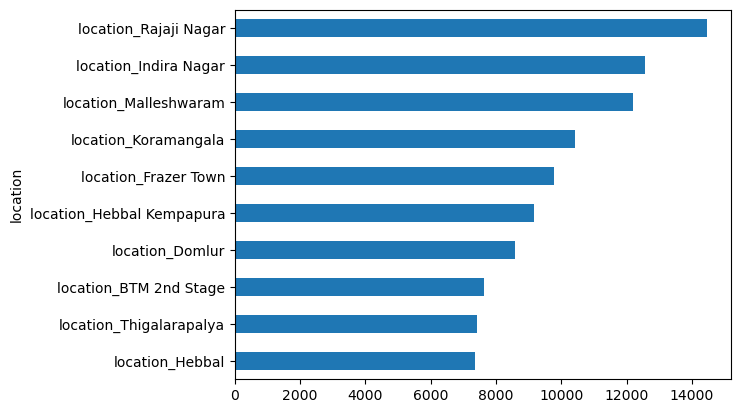

In [137]:
print('Locations with the highest average price per sqft:-')
data[data['location'] != 'Not specified'].groupby('location')['price_per_sqft'].mean().sort_values().tail(10).plot(kind = 'barh')

Locations with the lowest average price per sqft:-


<Axes: ylabel='location'>

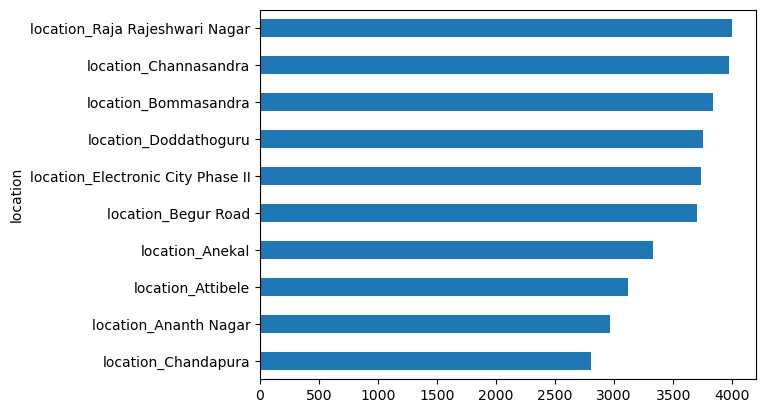

In [138]:
print('Locations with the lowest average price per sqft:-')
data[data['location'] != 'Not specified'].groupby('location')['price_per_sqft'].mean().sort_values().head(10).plot(kind = 'barh')

## Model Selection - K Nearest Neighbour

### Model building and Training

In [148]:
X = cleaned_data[['bath', 'balcony', 'total_sqft', 'bhk', 'price_per_sqft','super_builtup_area', 'builtup_area', 'plot_area', 
          'ready_to_move','location_Whitefield','location_Sarjapur  Road','location_Electronic City','location_Marathahalli',
          'location_Raja Rajeshwari Nagar','location_Haralur Road','location_Hennur Road','location_Bannerghatta Road',
          'location_Uttarahalli','location_Thanisandra','location_Electronic City Phase II','location_Hebbal',
          'location_7th Phase JP Nagar','location_Yelahanka','location_Kanakpura Road','location_KR Puram',
          'location_Sarjapur','location_Rajaji Nagar','location_Kasavanhalli','location_Bellandur',
          'location_Begur Road','location_Banashankari','location_Kothanur','location_Hormavu',
          'location_Harlur','location_Akshaya Nagar','location_Jakkur','location_Electronics City Phase 1','location_Varthur',
          'location_Chandapura','location_HSR Layout','location_Hennur','location_Ramamurthy Nagar','location_Ramagondanahalli',
          'location_Kaggadasapura','location_Kundalahalli','location_Koramangala','location_Hulimavu','location_Budigere',
          'location_Hoodi','location_Malleshwaram','location_Hegde Nagar','location_8th Phase JP Nagar','location_Gottigere',
          'location_JP Nagar','location_Yeshwanthpur','location_Channasandra','location_Bisuvanahalli','location_Vittasandra',
          'location_Indira Nagar','location_Vijayanagar','location_Kengeri','location_Brookefield','location_Sahakara Nagar',
          'location_Hosa Road','location_Old Airport Road','location_Bommasandra','location_Balagere',
          'location_Green Glen Layout','location_Old Madras Road','location_Rachenahalli','location_Panathur',
          'location_Kudlu Gate','location_Thigalarapalya','location_Ambedkar Nagar','location_Jigani',
          'location_Yelahanka New Town','location_Talaghattapura','location_Mysore Road','location_Kadugodi',
          'location_Frazer Town','location_Dodda Nekkundi','location_Devanahalli','location_Kanakapura','location_Attibele',
          'location_Anekal','location_Lakshminarayana Pura','location_Nagarbhavi','location_Ananth Nagar',
          'location_5th Phase JP Nagar','location_TC Palaya','location_CV Raman Nagar','location_Kengeri Satellite Town',
          'location_Kudlu','location_Jalahalli','location_Subramanyapura','location_Bhoganhalli','location_Doddathoguru',
          'location_Kalena Agrahara','location_Horamavu Agara','location_Vidyaranyapura','location_BTM 2nd Stage',
          'location_Hebbal Kempapura','location_Hosur Road','location_Horamavu Banaswadi','location_Domlur',
          'location_Mahadevpura','location_Tumkur Road']]
y = cleaned_data['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 1234)

In [167]:
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1, 40)}

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print(grid_search)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=19),
             param_grid={'n_neighbors': range(1, 40)},
             scoring='neg_mean_absolute_error')


We have used grid search with cross-validation to evaluate different k values and selected k = 19 as that results in the best performance.

In [168]:
knn = KNeighborsRegressor(n_neighbors = 19)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=19)

## Model Evaluation

In [173]:
y_pred = knn.predict(X_test)

print('Mean absolute error -',round(mean_absolute_error(y_test,y_pred),2))
print('Mean squared error -',round(mean_squared_error(y_test,y_pred),2))
print('Root mean squared error -',round(sqrt(mean_squared_error(y_test,y_pred)),2))

Mean absolute error - 4.4
Mean squared error - 2742.91
Root mean squared error - 52.37
